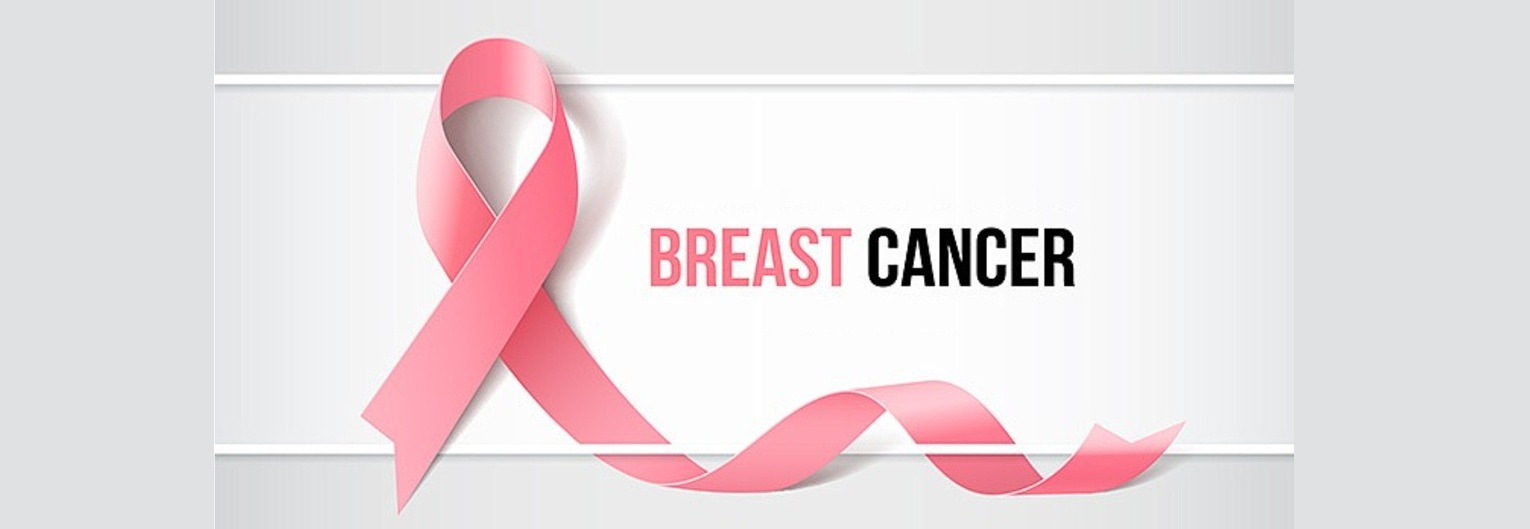

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Import Libraries</center></h1>
    


In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Get Data 

In [2]:
df = pd.read_csv('breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Statistic Analysis And Visualizations</center></h1>
    
# Statistic Analysis

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


# Visualizations

In [6]:

fig = px.histogram(
    data_frame=df,
    x='diagnosis',
    color='diagnosis',
    color_discrete_sequence=['#A865C9', '#f6abb6'],
    category_orders={'diagnosis': ['M', 'B']} 
)

fig.update_xaxes(
    tickvals=['M', 'B'],  
    ticktext=['Malignant', 'Benign'] 

)
fig.show()

NameError: name 'px' is not defined

In [443]:
colors = {
    'M': '#A865C9', 
    'B': '#f6abb6'   
}

features = ['area_mean','radius_mean', 'perimeter_mean', 'smoothness_mean', 'texture_mean']

for feature in features:
    fig = px.box(data_frame=df, 
                  x='diagnosis', 
                  y=feature, 
                  color='diagnosis', 
                  color_discrete_map=colors,
                  title=f'Distribution of {feature} by Diagnosis',
                  labels={'diagnosis': 'Diagnosis'},
                  points="all")  
    
    fig.show()

In [14]:
fig = px.scatter(data_frame=df, 
                 x='symmetry_worst', 
                 y='area_mean',  
                 color='diagnosis', 
                 color_discrete_map=colors,
                 title=' Relationship Between Worst and Area Mean by Diagnosis',
                 labels={'diagnosis': 'Diagnosis'})
fig.show()

NameError: name 'px' is not defined

In [15]:
fig = px.scatter(data_frame=df, 
                 x='concavity_worst', 
                 color='diagnosis', 
                 color_discrete_sequence=['#A865C9', '#f6abb6'],
                 title='Relationship Between Concavity Worst and Diagnosis', 
                 labels={'diagnosis': 'Diagnosis'})
fig.show()

NameError: name 'px' is not defined

In [446]:
fig = px.scatter(data_frame=df, 
                 x='fractal_dimension_worst', 
                 color='diagnosis', 
                 color_discrete_sequence=['#A865C9', '#f6abb6'],
                 title='Fractal Dimension Worst by Diagnosis',  
                 labels={'diagnosis': 'Diagnosis'}) 
fig.show()

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>
    
# Data Preprocessing

In [16]:
df = df.drop(columns=['id'])
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [17]:
corr = df.corr()

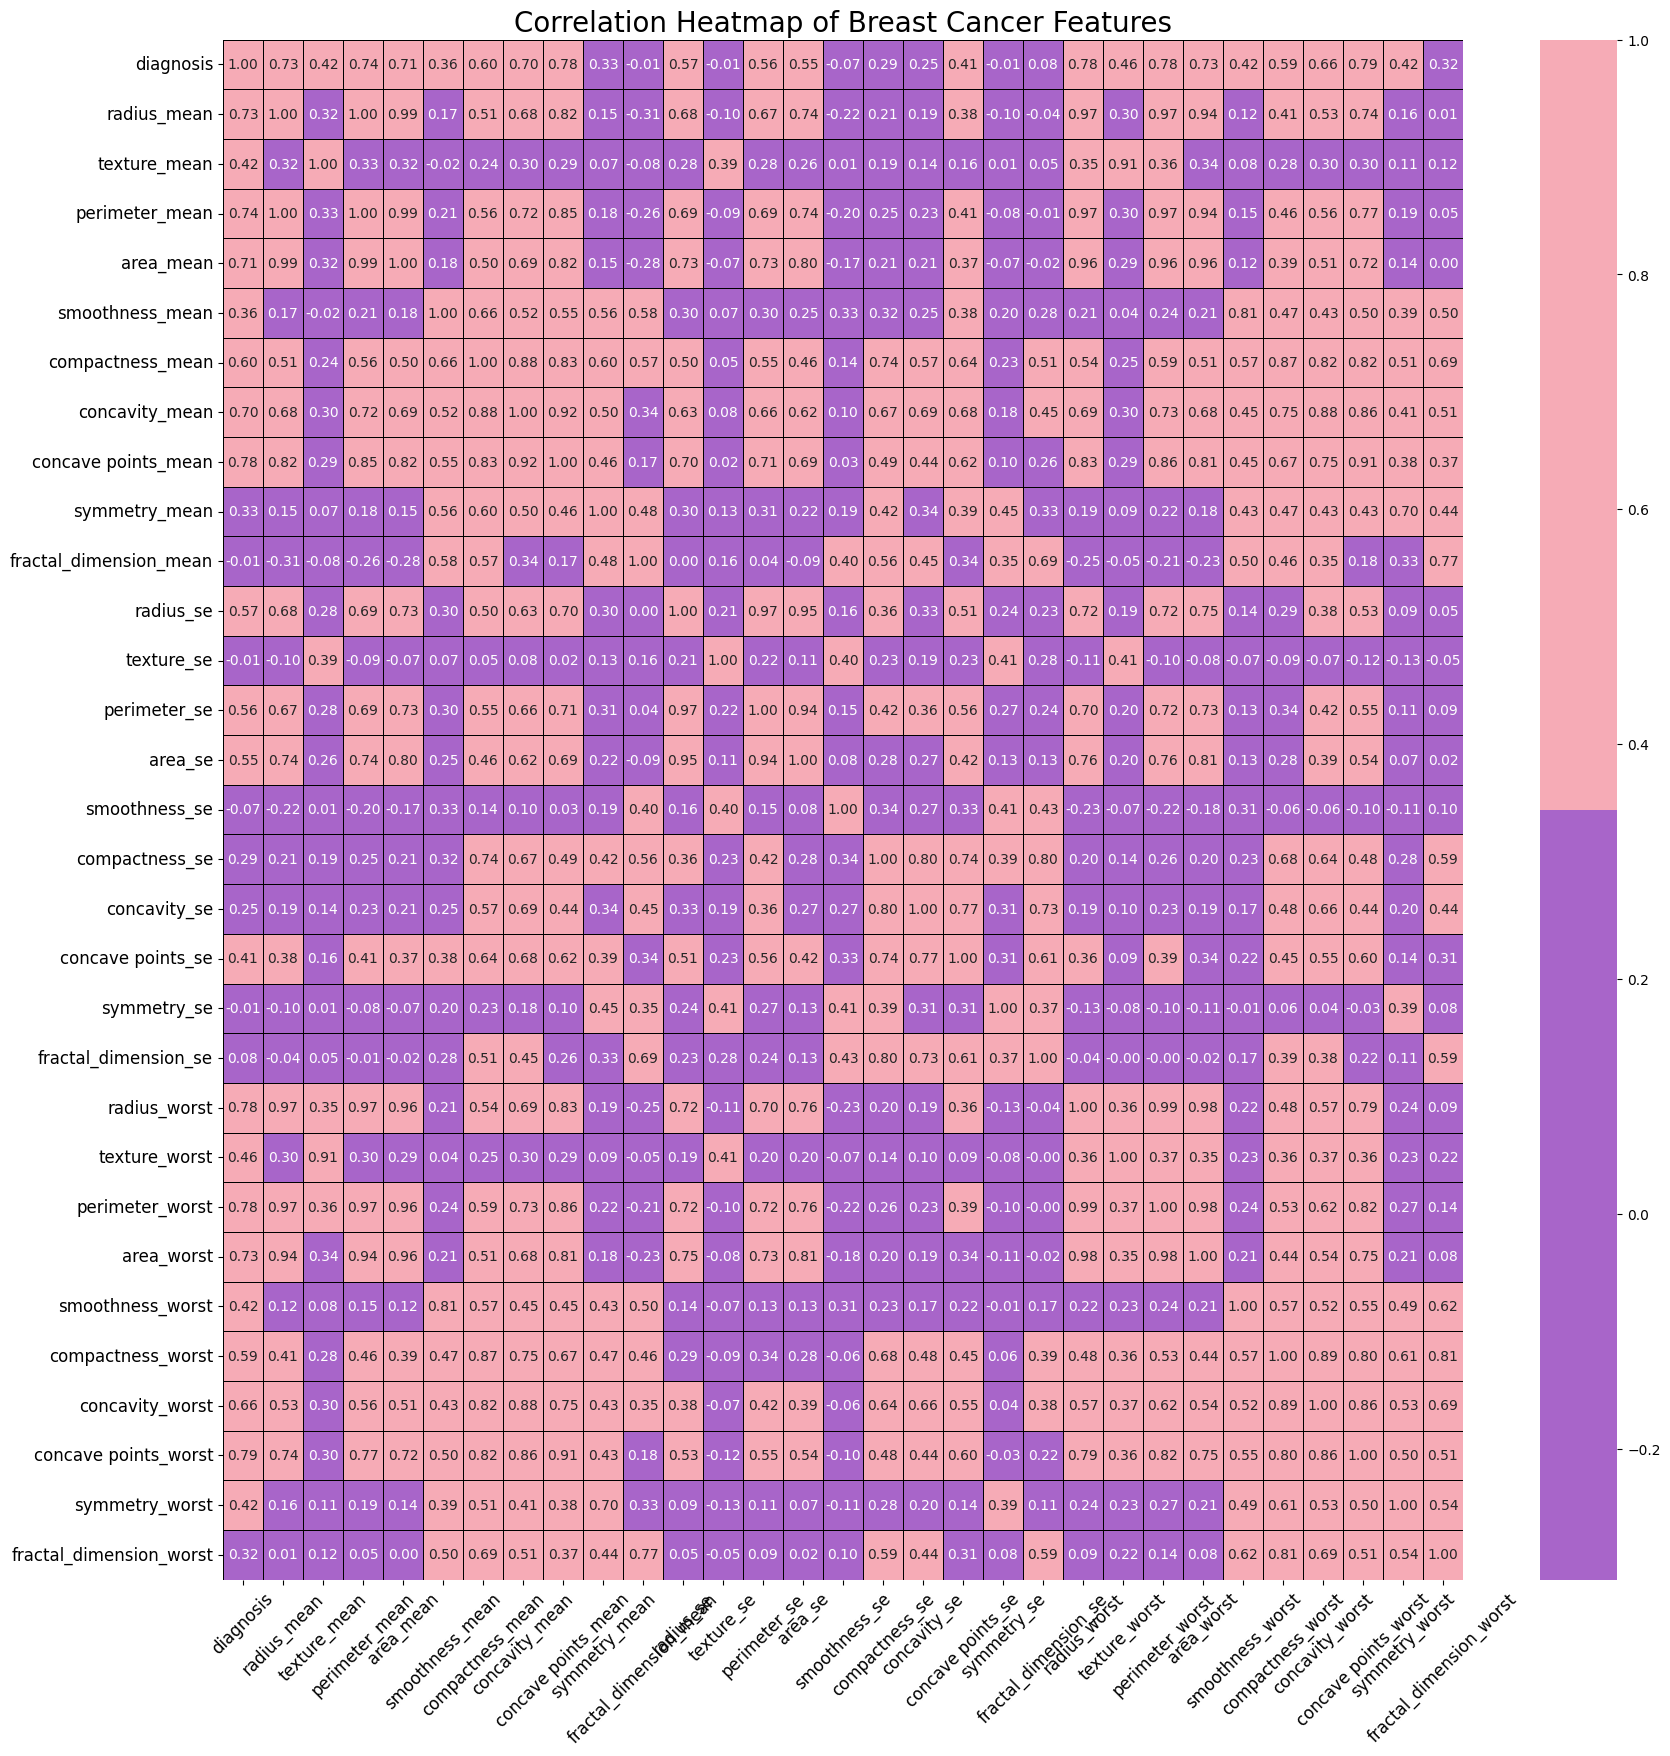

In [18]:
colors = ["#A865C9", "#f6abb6"]  

plt.figure(figsize=(20, 20))
sns.heatmap(corr, 
            cmap=sns.color_palette(colors),  
            annot=True,                      
            fmt='.2f',                     
            linewidths=.5,                  
            linecolor='black'                
           )
plt.title('Correlation Heatmap of Breast Cancer Features', fontsize=20)
plt.xticks(rotation=45, fontsize=12)  
plt.yticks(rotation=0, fontsize=12)    
#-----------------------------------------
cor_target = abs(corr["diagnosis"])
relevant_features = cor_target[cor_target > 0.2]
names = [index for index, value in relevant_features.items()]
features_df = pd.DataFrame({
    'Feature': names,
    'Correlation with Diagnosis': [cor_target[name] for name in names]
})


In [19]:
features_df = features_df.sort_values(by='Correlation with Diagnosis', ascending=False)
print(features_df)

                    Feature  Correlation with Diagnosis
0                 diagnosis                    1.000000
23     concave points_worst                    0.793566
18          perimeter_worst                    0.782914
8       concave points_mean                    0.776614
16             radius_worst                    0.776454
3            perimeter_mean                    0.742636
19               area_worst                    0.733825
1               radius_mean                    0.730029
4                 area_mean                    0.708984
7            concavity_mean                    0.696360
22          concavity_worst                    0.659610
6          compactness_mean                    0.596534
21        compactness_worst                    0.590998
10                radius_se                    0.567134
11             perimeter_se                    0.556141
12                  area_se                    0.548236
17            texture_worst                    0

<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Modeling</center></h1>
    
##  Data Preparation for Modeling
<a name="4-1"></a>

In [20]:
X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Logistic Regression
<a name="4-1"></a>

In [23]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
print("\nLogistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))


Logistic Regression
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



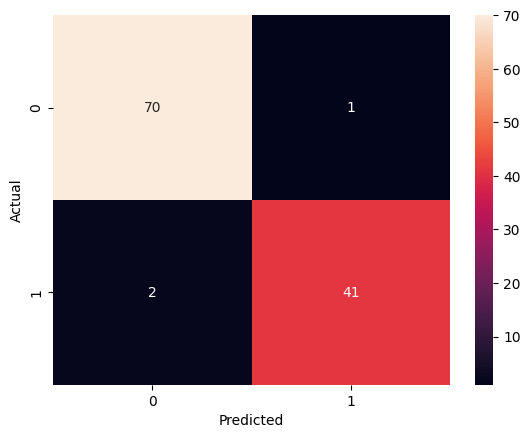

In [24]:
cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## SVM
<a name="4-1"></a>

In [25]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("\nSupport Vector Machine")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))


Support Vector Machine
Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



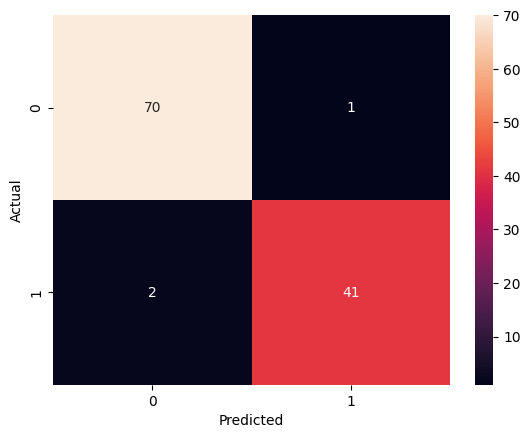

In [26]:
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a name="4-2"></a>
## Decision Tree 

In [27]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)
print("\nDecision Tree")
print("Accuracy:", accuracy_score(y_test, y_pred_decision_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_decision_tree))



Decision Tree
Accuracy: 0.9298245614035088
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



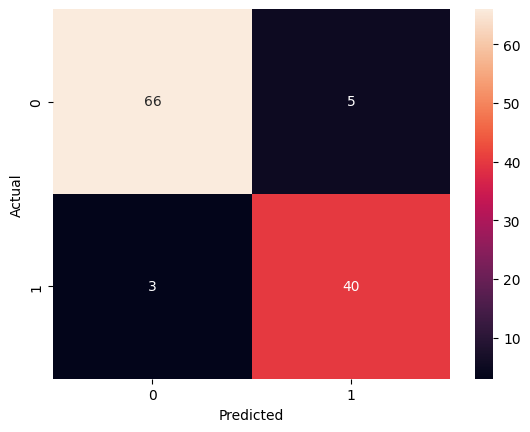

In [28]:
cm = confusion_matrix(y_test, y_pred_decision_tree)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a name="4-3"></a>
## KNearestNeighbors

In [29]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("\nK-Nearest Neighbors")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))



K-Nearest Neighbors
Accuracy: 0.9473684210526315
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.93      0.93      0.93        43

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



c:\Users\takya\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\takya\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\takya\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\takya\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  

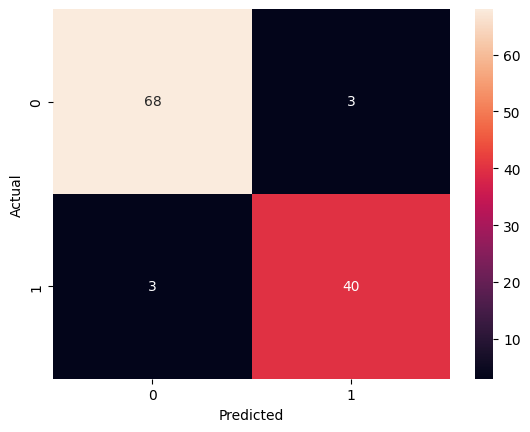

In [30]:
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a name="4-4"></a>
## RandomForestClassifer

In [31]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_random_forest = random_forest.predict(X_test)
print("\nRandom Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_random_forest))
print("Classification Report:\n", classification_report(y_test, y_pred_random_forest))


Random Forest
Accuracy: 0.9649122807017544
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



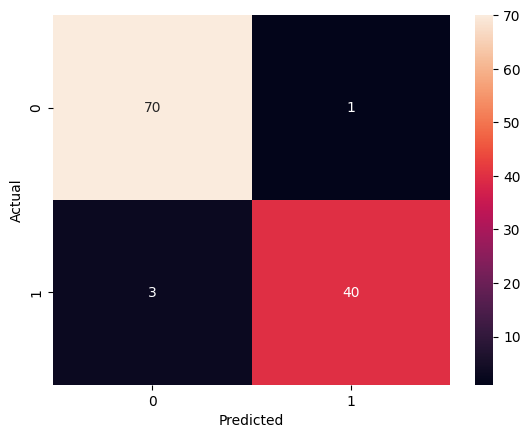

In [32]:
cm = confusion_matrix(y_test, y_pred_random_forest)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a name="4-5"></a>
## XGBoost

In [33]:
xgboost_model = xgb.XGBClassifier(eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgboost = xgboost_model.predict(X_test)

print("\nXGBoost")
print("Accuracy:", accuracy_score(y_test, y_pred_xgboost))
print("Classification Report:\n", classification_report(y_test, y_pred_xgboost))


XGBoost
Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



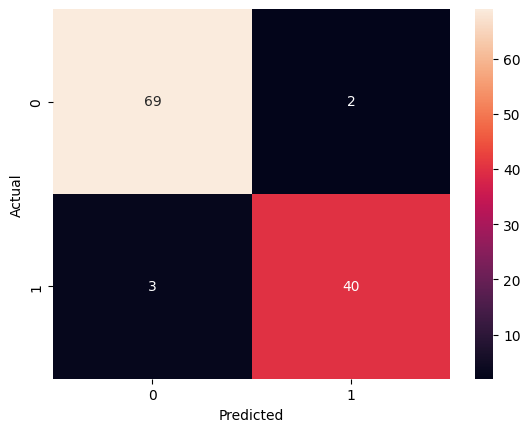

In [34]:
cm = confusion_matrix(y_test, y_pred_xgboost)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>

# Evaluation

In [35]:
model_performance = {}

def evaluate_model(name, model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    model_performance[name] = {
        'Accuracy': accuracy,
        'Precision (Malignant)': report['1']['precision'],
        'Recall (Malignant)': report['1']['recall'],
        'F1-score (Malignant)': report['1']['f1-score'],
        'Precision (Benign)': report['0']['precision'],
        'Recall (Benign)': report['0']['recall'],
        'F1-score (Benign)': report['0']['f1-score']
    }

evaluate_model("Logistic Regression", LogisticRegression(), X_train, X_test, y_train, y_test)
evaluate_model("Support Vector Machine", SVC(), X_train, X_test, y_train, y_test)
evaluate_model("K-Nearest Neighbors", KNeighborsClassifier(), X_train, X_test, y_train, y_test)
evaluate_model("Decision Tree", DecisionTreeClassifier(), X_train, X_test, y_train, y_test)
evaluate_model("Random Forest", RandomForestClassifier(), X_train, X_test, y_train, y_test)
evaluate_model("XGBoost", xgb.XGBClassifier(eval_metric='logloss'), X_train, X_test, y_train, y_test)

performance_df = pd.DataFrame(model_performance).T
performance_df.sort_values(by=['F1-score (Malignant)', 'Recall (Malignant)', 'Accuracy'], ascending=False, inplace=True)
print(performance_df)

best_model_name = performance_df.index[0]
print(f"\nBest model based on F1-score and Recall for Malignant class: {best_model_name}")


                        Accuracy  Precision (Malignant)  Recall (Malignant)  \
Logistic Regression     0.973684               0.976190            0.953488   
Support Vector Machine  0.973684               0.976190            0.953488   
Random Forest           0.964912               0.975610            0.930233   
XGBoost                 0.956140               0.952381            0.930233   
K-Nearest Neighbors     0.947368               0.930233            0.930233   
Decision Tree           0.938596               0.928571            0.906977   

                        F1-score (Malignant)  Precision (Benign)  \
Logistic Regression                 0.964706            0.972222   
Support Vector Machine              0.964706            0.972222   
Random Forest                       0.952381            0.958904   
XGBoost                             0.941176            0.958333   
K-Nearest Neighbors                 0.930233            0.957746   
Decision Tree                       0.

In [36]:
with open('model.pkl', 'wb') as file:
    pickle.dump(log_reg, file)